In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-04-06 01:44:30.146655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 各パス指定 // Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定 // Classification number setting

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み // Load learning data

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
# delimeter = angka dalam data dipisahkan oleh koma
# usecols = kolam mana yang harus dimuat,dalam hal ini dia merujuk dari 1 ke 42.

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築 // model building

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax') #output layer fungsi softmax
])

In [36]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [37]:
# モデルチェックポイントのコールバック // Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [38]:
# モデルコンパイル // model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練 // model training

In [39]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
67/74 [==========================>...] - ETA: 0s - loss: 3.1275 - accuracy: 0.0882
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 1s 10ms/step - loss: 3.1114 - accuracy: 0.0897 - val_loss: 2.9132 - val_accuracy: 0.1189
Epoch 2/1000
68/74 [==========================>...] - ETA: 0s - loss: 2.7692 - accuracy: 0.1361
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 1s 7ms/step - loss: 2.7467 - accuracy: 0.1419 - val_loss: 2.4334 - val_accuracy: 0.2540
Epoch 3/1000
74/74 [==============================] - ETA: 0s - loss: 2.2474 - accuracy: 0.2816
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
74/74 [==============================] - 1s 8ms/step - loss: 2.2474 - accuracy: 0.2816 - val_loss: 1.8611 - val_accuracy: 0.4601
Epoch 4/1000
67/74 [==========================>...] - ETA: 0s - loss: 1.7962 - accuracy: 0.4340


In [40]:
# モデル評価 // model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

25/25 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9994


In [41]:
# 保存したモデルのロード // Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [42]:
# 推論テスト // Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 65ms/step
[6.22147611e-22 0.00000000e+00 2.59926810e-32 6.80562766e-18
 9.71501082e-34 0.00000000e+00 0.00000000e+00 1.22939545e-33
 2.73735733e-29 1.12591544e-20 0.00000000e+00 8.45436445e-28
 7.36197518e-19 1.00000000e+00 6.81128641e-19 0.00000000e+00
 3.67663337e-24 1.02731572e-18 2.40052704e-12 2.06392597e-10
 1.51120017e-20 1.18421574e-34 3.73070694e-21 7.29573467e-37
 2.38551237e-18 7.71135067e-09]
13


# 混同行列 // confusion matrix

99/99 [==============================] - 0s 3ms/step


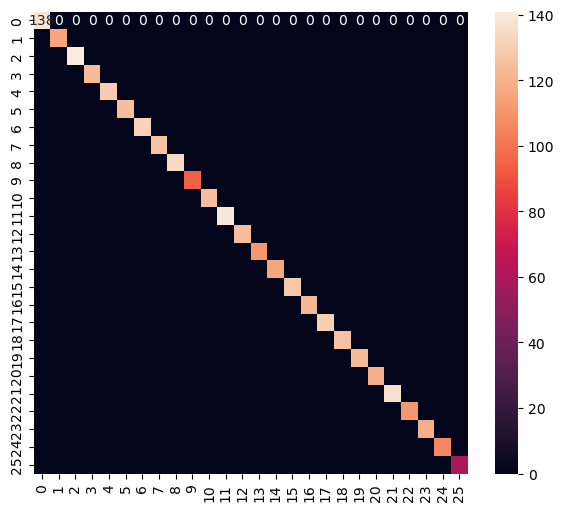

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00       141
           3       1.00      1.00      1.00       123
           4       1.00      1.00      1.00       129
           5       1.00      1.00      1.00       124
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00       126
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00        94
          10       1.00      1.00      1.00       124
          11       1.00      1.00      1.00       140
          12       1.00      1.00      1.00       124
          13       1.00      1.00      1.00       111
          14       1.00      1.00      1.00       116
          15       1.00      1.00      1.00       128
          16       1.00      1.00      1.00       122
     

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換 // Convert to model for

In [44]:
# 推論専用のモデルとして保存 // Save as a model for inference only
model.save(model_save_path, include_optimizer=False)

In [45]:
# モデルを変換(量子化) // Transform the model (quantize)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2024-04-06 01:59:47.326785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,20]
	 [[{{node inputs}}]]
2024-04-06 01:59:47.454473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,20]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /tmp/tmpbo0ii_15/assets


INFO:tensorflow:Assets written to: /tmp/tmpbo0ii_15/assets
2024-04-06 01:59:47.996955: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-06 01:59:47.996979: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-04-06 01:59:47.997177: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpbo0ii_15
2024-04-06 01:59:47.998153: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-04-06 01:59:47.998164: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpbo0ii_15
2024-04-06 01:59:48.002403: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-04-06 01:59:48.034576: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpbo0ii_15
2024-04-06 01:59:48.043774: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

7576

# 推論テスト // Reasoning test

In [46]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [47]:
# 入出力テンソルを取得 // Get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [48]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [49]:
%%time
# 推論実施 // Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 122 µs, sys: 144 µs, total: 266 µs
Wall time: 242 µs


In [50]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.2214756e-22 0.0000000e+00 2.5992675e-32 6.8056012e-18 9.7150090e-34
 0.0000000e+00 2.3509887e-38 1.2293858e-33 2.7373567e-29 1.1259196e-20
 0.0000000e+00 8.4543953e-28 7.3619462e-19 1.0000000e+00 6.8112595e-19
 0.0000000e+00 3.6766326e-24 1.0273156e-18 2.4005177e-12 2.0639299e-10
 1.5112000e-20 1.1842155e-34 3.7306924e-21 7.2957889e-37 2.3855211e-18
 7.7113507e-09]
13
